<a href="https://colab.research.google.com/github/hgf777-br/trabalho-final-deep-learning/blob/master/MNIST_com_Salvamento_no_GDrive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Carregando Bibliotecas

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import keras
from keras.utils.np_utils import  to_categorical
from keras.models import Sequential,load_model
from keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model

from keras.datasets import mnist

from sklearn.model_selection import train_test_split
#from keras.utils import plot_model

Inicializa o Google Drive. É necessário entrar com as credenciais do Gmail

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Carregando os dataset treinamento / teste

In [ ]:
(xorig_train, yorig_train), (x_test, y_test) = mnist.load_data()

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


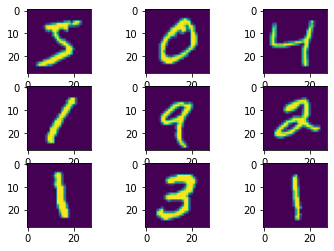

In [ ]:
print('Train: X=%s, y=%s' % (xorig_train.shape, yorig_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(xorig_train[i])
# show the figure
plt.show()

### 3. Redimensionando as imagens e dividindo cada pixel em cada imagem por 255

In [ ]:
xorig_train = xorig_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
xorig_train = xorig_train.reshape(xorig_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


### 4.  Dividindo o dataset em treinamento, teste e validação

In [ ]:
num_classes = len(np.unique(yorig_train))
x_train, x_valid = train_test_split(xorig_train, test_size = .25)
y_train, y_valid = train_test_split(yorig_train, test_size = .25)

#y_train = to_categorical(y_train, 10)
#y_test = to_categorical(y_test, 10)

In [ ]:
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)

In [ ]:
y_train
y_valid

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
num_classes

10

In [ ]:
#(x_valid, x_train) = x_train[:5000], x_train[5000:]
#(y_valid, y_train) = y_train[:5000], y_train[5000:] 

#(x2_train, x2_valid) = x_train[:45000], x_train[45000:]
#(y2_train, y2_valid) = y_train[:5000], y_train[:5000] 

#a[start:stop]  # items start through stop-1
#a[start:]      # items start through the rest of the array
#a[:stop]       # items from the beginning through stop-1
#a[:]           # a copy of the whole array


#x_valid = x_test[:4500]
#y_valid = y_test[:4500] 

#(xxx_train, xxx_valid) = x_train[10000:], x_train[:10000]
#(yyy_train, yyy_valid) = y_train[10000:], y_train[:10000] 

#xfin_train = np.concatenate((xx_train, xxx_train)) 
#xfin_valid = np.concatenate((xx_valid, xxx_valid)) 
#yfin_train = np.concatenate((yy_train, yyy_train)) 
#yfin_valid = np.concatenate((yy_valid, yyy_valid)) 

#xvar_train, x_valid = train_test_split(x_train, test_size = .10)
#yvar_train, y_valid = train_test_split(y_train, test_size = .10)

Impressão da forma do conjunto de treino

In [ ]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)


x_train shape: (45000, 28, 28, 1)
y_train shape: (45000, 10)


In [ ]:
print('x_valid shape:', x_valid.shape)
print('y_valid shape:', y_valid.shape)

x_valid shape: (15000, 28, 28, 1)
y_valid shape: (15000, 10)


Impressão do número de imagens nos datasets de treinamento, teste e validação

In [ ]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')


45000 train samples
10000 test samples
15000 validation samples


## 5. arquitetura do modelo






In [ ]:
model = Sequential()
model.add(Conv2D(filters=10, kernel_size=4,  activation='relu', input_shape=(28,28,1)))                        
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.15))

In [ ]:
model.add(Conv2D(filters=16, kernel_size=3,  activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.15))


In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(84, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(num_classes, activation='softmax'))

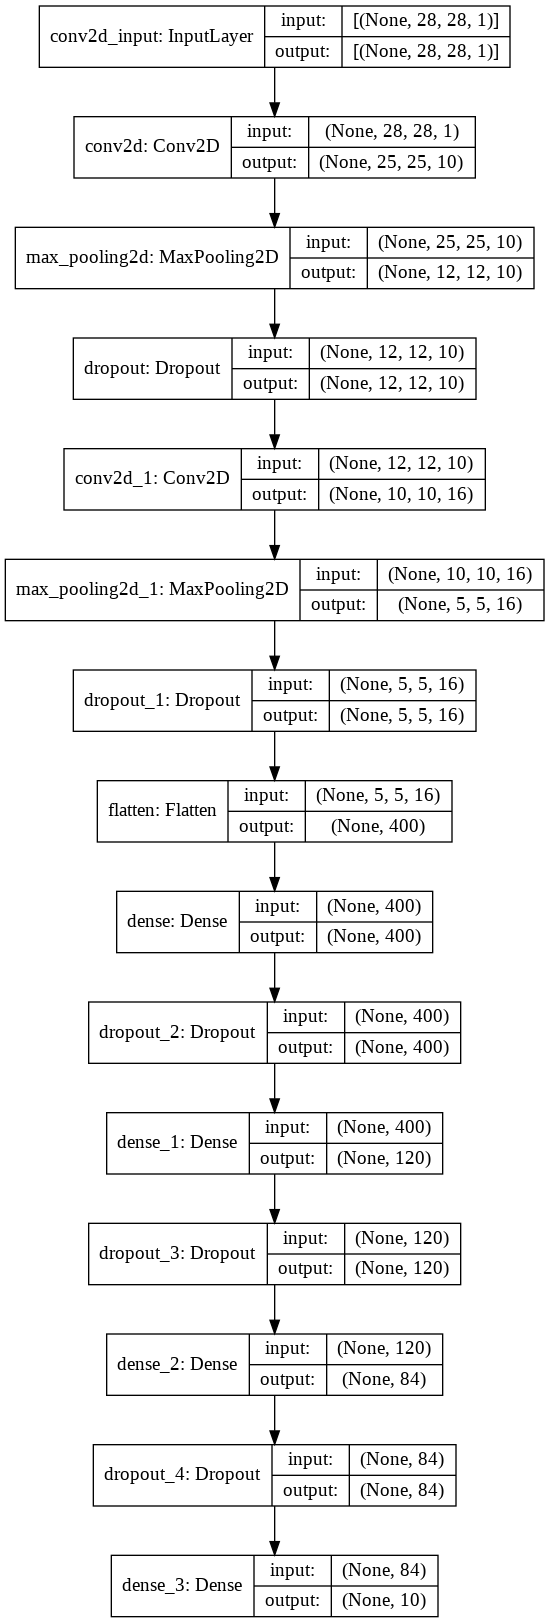

In [ ]:
plot_model(model, to_file='lenet5-mnist.png', show_shapes=True, show_layer_names=True)

### 6. Compilando o modelo

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
                  

### 7. Treinando o modelo

In [ ]:
from keras.callbacks import ModelCheckpoint   

#O keras passa a salvar o melhor modelo pela acurácia de validação

In [ ]:
checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/checkpoints/modelo_mnist_teste_1.hdf5', verbose=1,  save_best_only=True, monitor='val_accuracy') #
                              
hist = model.fit(x_train, y_train, batch_size=30, epochs=40, validation_data=(x_valid, y_valid), callbacks=[checkpointer], verbose=1, shuffle=True)

Epoch 1/40
1500/1500 [==============================] - 22s 4ms/step - loss: 2.3033 - accuracy: 0.1080 - val_loss: 2.3031 - val_accuracy: 0.1069

Epoch 00001: val_accuracy improved from -inf to 0.10687, saving model to /content/drive/My Drive/checkpoints/modelo_mnist_teste_1.hdf5
Epoch 2/40
1500/1500 [==============================] - 5s 4ms/step - loss: 2.3015 - accuracy: 0.1123 - val_loss: 2.3029 - val_accuracy: 0.1069

Epoch 00002: val_accuracy did not improve from 0.10687
Epoch 3/40
1500/1500 [==============================] - 5s 4ms/step - loss: 2.3002 - accuracy: 0.1166 - val_loss: 2.3027 - val_accuracy: 0.1069

Epoch 00003: val_accuracy did not improve from 0.10687
Epoch 4/40
1500/1500 [==============================] - 5s 4ms/step - loss: 2.3011 - accuracy: 0.1141 - val_loss: 2.3024 - val_accuracy: 0.1069

Epoch 00004: val_accuracy did not improve from 0.10687
Epoch 5/40
1500/1500 [==============================] - 5s 4ms/step - loss: 2.3007 - accuracy: 0.1132 - val_loss: 2.302

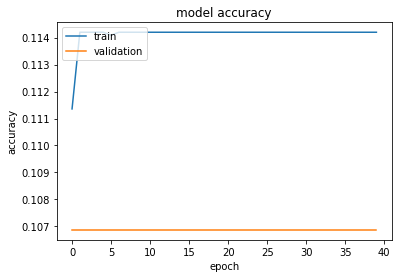

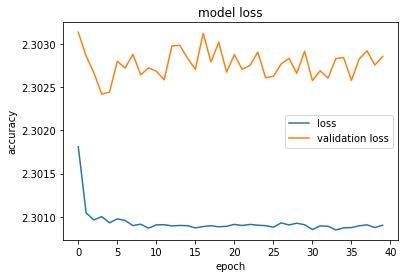

In [ ]:
plt.figure(1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.figure(1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'])
plt.show()

Carregar o melhor modelo que obteve a melhor acurácia de validação no treinamento

In [ ]:
model = load_model("/content/drive/My Drive/checkpoints/modelo_mnist_teste_1.hdf5")

### 8. Cálculo da precisão de classificação no dataset de testes

Avaliar e imprimir a precisão do teste

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

ValueError: ignored

### 9. Visualizar algumas predições

As visualizações podem nos dar algumas dicas sobre por que a rede classifica erroneamente alguns objetos.
Obtendo previsões no conjunto de testes:

In [ ]:
y_hat = model.predict(x_test)

In [ ]:
y_hat[100,:]

In [ ]:
y_hat_classes = model.predict_classes(x_test)
y_hat_classes

In [ ]:
y_hat_classes[100]

Definindo rótulos de texto (rótulos disponíveis na fonte original: https://www.cs.toronto.edu/~kriz/cifar.html)

In [ ]:
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Plot de amostra aleatória de imagens de teste, rótulos preditos e a "ground truth" advinda do dataset CIFAR-10

In [ ]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    # amostras corretamente classificadas em verde, incorretamente classificadas em vermelho
